# NAMA    : UMAR SABIRIN
# NIM     : H071201059
# KELAS   : PEMROSESAN CITRA DIGITAL A
# QUIZ 1


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


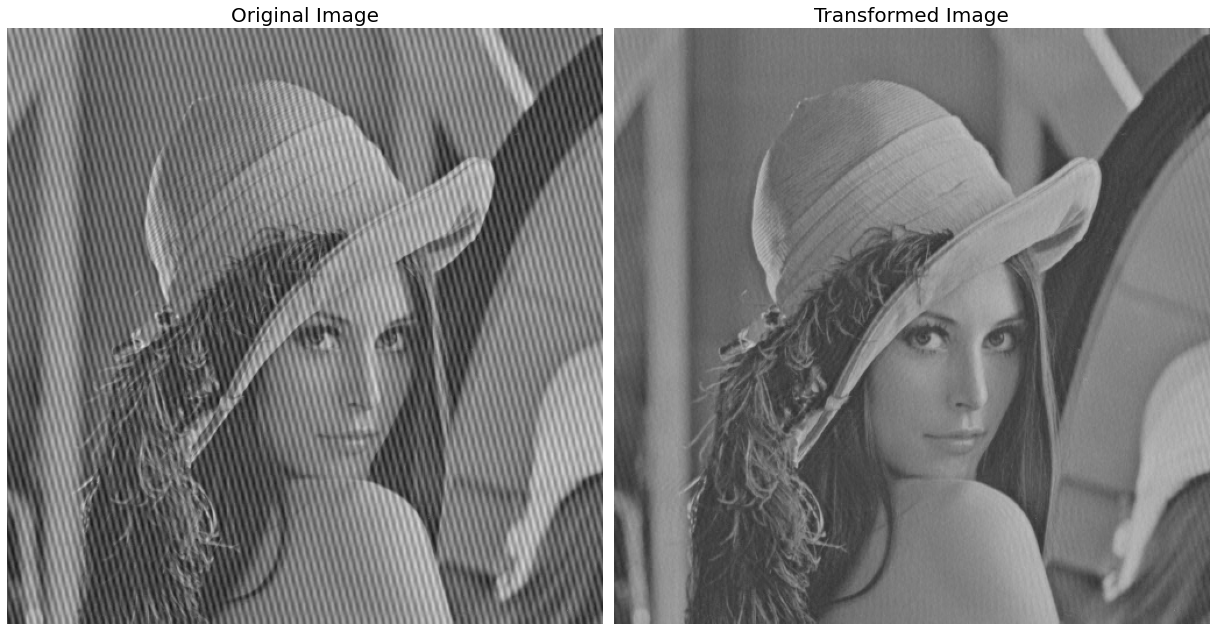

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

ori_image = imread('drive/My Drive/Colab Notebooks/lena_priodic.jpeg')

def remove_noise(image):
    f_size = 20
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        rgb_fft[:253, 336:344] = 1
        rgb_fft[-253:,336:344] = 1
        rgb_fft[:253, 173:181] = 1
        rgb_fft[-253:,173:181] = 1     
        transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))
    
    final_image = np.dstack([transformed_channels[0].astype(int),
                             transformed_channels[1].astype(int),
                             transformed_channels[2].astype(int)])
    
    fig, ax = plt.subplots(1, 2, figsize=(17,12))
    ax[0].imshow(image)
    ax[0].set_title('Original Image', fontsize = f_size)
    ax[0].set_axis_off()
    
    ax[1].imshow(final_image)
    ax[1].set_title('Transformed Image', fontsize = f_size)
    ax[1].set_axis_off()
    
    fig.tight_layout()

remove_noise(ori_image)